# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error

print(os.getcwd())

/Users/Gabe/Desktop/Data Science/Projects/Guided Capstone


## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [125]:
#import data
path = os.getcwd()
ski_data = pd.read_csv(path + '/data/step3_output.csv' , index_col = 0)

#standardize data and split
X = ski_data.drop(['Name', 'state', 'AdultWeekend', 'summit_elev'], axis = 1)

y = ski_data['AdultWeekend']

scaler = preprocessing.StandardScaler().fit(X)

X_scaled=scaler.transform(X)  

y = np.ravel(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

#create and run linear model
lm = linear_model.LinearRegression()

model = lm.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(explained_variance_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

print(model.intercept_)

coef = pd.DataFrame(abs(model.coef_), X.columns, columns=['Coefficient'])
coef = coef.sort_values('Coefficient', ascending = False)
print(coef.head(10))

0.5413080297878097
7.275361831392762
56.169716762833055
                   Coefficient
AdultWeekday         10.718374
averageSnowfall       2.856805
clusters              2.234782
vertical_drop         1.905925
SkiableTerrain_ac     1.761634
daysOpenLastYear      1.459799
triple                1.229914
Runs                  1.099987
NightSkiing_ac        1.028189
surface               0.901449


In [126]:
ski_data_0 = pd.read_csv(path + '/data/step3b_output.csv' , index_col = 0)

X_0 = ski_data_0.drop(['Name', 'state', 'AdultWeekend', 'summit_elev'], axis = 1)

y_0 = ski_data_0['AdultWeekend']

scaler_0 = preprocessing.StandardScaler().fit(X_0)

X_0_scaled = scaler_0.transform(X_0)

y_0 = np.ravel(y_0)

X_0_train, X_0_test, y_0_train, y_0_test = train_test_split(X_0_scaled, y_0, test_size=0.25, random_state=1)

lm_0 = linear_model.LinearRegression()

model_0 = lm_0.fit(X_0_train, y_0_train)

y_0_pred = model_0.predict(X_0_test)

print(explained_variance_score(y_0_test, y_0_pred))
print(mean_absolute_error(y_0_test, y_0_pred))

print(model_0.intercept_)

coef_0 = pd.DataFrame(abs(lm_0.coef_), X_0.columns, columns=['Coefficient'])
coef_0 = coef_0.sort_values('Coefficient', ascending = False)
print(coef_0.head(10))

0.9365302558936701
5.094973346971159
64.05615442773096
                  Coefficient
AdultWeekday        20.128806
clusters             2.647871
vertical_drop        2.064305
triple               1.450975
Runs                 1.361873
surface              1.250484
quad                 1.239127
daysOpenLastYear     1.201522
averageSnowfall      0.987277
fastQuads            0.767482


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [127]:
Big_Mountain = ski_data_0[ski_data_0['Name'].str.contains('Whitefish')]
print(Big_Mountain)

                          Name    state  summit_elev  vertical_drop  trams  \
151  Whitefish Mountain Resort  Montana         6817           2353      0   

     fastEight  fastSixes  fastQuads  quad  triple  ...  SkiableTerrain_ac  \
151        0.0          0          3     2       6  ...             3000.0   

     Snow Making_ac  daysOpenLastYear  yearsOpen  averageSnowfall  \
151           600.0             123.0       72.0            333.0   

     AdultWeekday  AdultWeekend  projectedDaysOpen  NightSkiing_ac  clusters  
151          81.0          81.0              123.0           600.0         1  

[1 rows x 26 columns]


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [137]:
#standardize data and split
BM = Big_Mountain.drop(['Name', 'state', 'AdultWeekend', 'summit_elev'], axis = 1)

#X_0['clusters'] = 0

BM_p = round(float(Big_Mountain['AdultWeekend']),2)

BM_scaled =scaler_0.transform(BM) 


**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [138]:
Big_Mountain_pred = round(float(model_0.predict(BM_scaled)), 2)
print('The model predicts an adult weekend ticket price of: $' + str(Big_Mountain_pred))

The model predicts an adult weekend ticket price of: $87.88


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [130]:
print('Big Mountain is currently charging: $' + str(BM_p))

Big Mountain is currently charging: $81.0


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

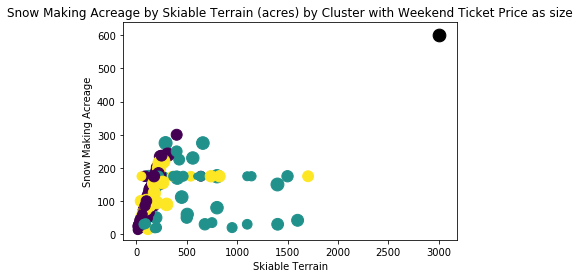

In [105]:
plt.scatter(ski_data['SkiableTerrain_ac'], ski_data['Snow Making_ac'], c=ski_data['clusters'], s=(ski_data['AdultWeekend'] * 2), cmap='viridis', label ='clusters')
plt.scatter(Big_Mountain['SkiableTerrain_ac'], Big_Mountain['Snow Making_ac'], c='black', s=(Big_Mountain['AdultWeekend']*2))
plt.xlabel('Skiable Terrain')
plt.ylabel('Snow Making Acreage')
plt.title('Snow Making Acreage by Skiable Terrain (acres) by Cluster with Weekend Ticket Price as size')
plt.savefig('figures/fig2.png',bbox_inches='tight')

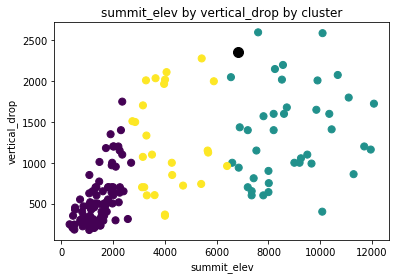

In [106]:
plt.scatter(ski_data['summit_elev'], ski_data['vertical_drop'], c=ski_data['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(Big_Mountain['summit_elev'], Big_Mountain['vertical_drop'], c='black', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

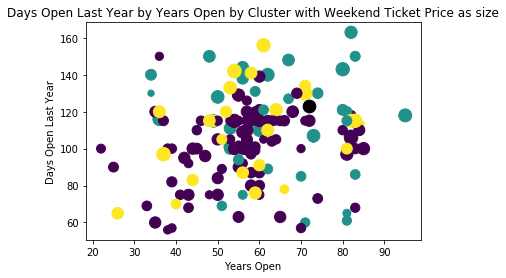

In [108]:
plt.scatter(ski_data['yearsOpen'], ski_data['daysOpenLastYear'], c=ski_data['clusters'], s=(ski_data['AdultWeekend']*2), cmap='viridis', label ='clusters')
plt.scatter(Big_Mountain['yearsOpen'], Big_Mountain['daysOpenLastYear'], c='black', s=(Big_Mountain['AdultWeekend']*2))
plt.xlabel('Years Open')
plt.ylabel('Days Open Last Year')
plt.title('Days Open Last Year by Years Open by Cluster with Weekend Ticket Price as size')
plt.savefig('figures/fig3.png',bbox_inches='tight')

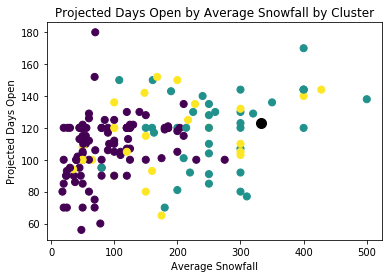

In [109]:
plt.scatter(ski_data['averageSnowfall'], ski_data['projectedDaysOpen'], c=ski_data['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(Big_Mountain['averageSnowfall'], Big_Mountain['projectedDaysOpen'], c='black', s=100)
plt.xlabel('Average Snowfall')
plt.ylabel('Projected Days Open')
plt.title('Projected Days Open by Average Snowfall by Cluster')
plt.savefig('figures/fig4.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [110]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, path + '/models/regression_model_adultweekend.joblib') 

['/Users/Gabe/Desktop/Data Science/Projects/Guided Capstone/models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [151]:
Model_No_Outliers = pd.DataFrame(np.round(lm.coef_,6), X.columns, columns = ['No_Outliers'])
Model_With_Outliers = pd.DataFrame(lm_0.coef_, X_0.columns, columns = ['With_Outliers'])
Model_Stats = pd.concat([Model_No_Outliers, Model_With_Outliers], axis = 1)
data_dict = {'Explained_Variance_Score': [0.541308, 0.936530], 'Mean_Absolute_Error': [7.275362, 5.094973], 'Predicted_Weekend_Price': [90.88, 87.88]}
Model_Performance = pd.DataFrame.from_dict(data_dict, orient = 'index', columns = ['No_Outliers', 'With_Outliers'])
Model_Stats = pd.concat([Model_Stats, Model_Performance], keys = ['Coefficients', 'Metrics'])
Model_Stats


No_Outliers  With_Outliers
Coefficients vertical_drop                1.905925       2.064305
             trams                        0.000000      -0.285837
             fastEight                    0.000000       0.037436
             fastSixes                    0.000000       0.465705
             fastQuads                   -0.001950       0.767482
             quad                         0.278725       1.239127
             triple                       1.229914       1.450975
             double                       0.861119       0.269590
             surface                     -0.901449      -1.250484
             total_chairs                 0.620436       0.641832
             Runs                         1.099987      -1.361873
             TerrainParks                 0.230052      -0.289076
             LongestRun_mi               -0.055306      -0.316646
             SkiableTerrain_ac           -1.761634       0.124049
             Snow Making_ac               0.262785       0.086740
             daysOpenLastYear             1.459799       1.201522
             yearsOpen                   -0.027533       0.255528
             averageSnowfall             -2.856805      -0.987277
             AdultWeekday                10.718374      20.128806
             projectedDaysOpen           -0.140035      -0.587744
             NightSkiing_ac               1.028189       0.423496
             clusters                     2.234782      -2.647871
Metrics      Explained_Variance_Score     0.541308       0.936530
             Mean_Absolute_Error          7.275362       5.094973
             Predicted_Weekend_Price     90.880000      87.880000

In [152]:
Model_Stats.to_csv(path + '/data/Model_Stats.csv')